# Task 1

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

dataset = load_iris()
X, Y = dataset.data, dataset.target  
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = Y

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Task 2

In [3]:
print('=====Dataset Info=====')
print(df.info())
print('=====Dataset shape=====')
print(df.shape)

=====Dataset Info=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
=====Dataset shape=====
(150, 5)


In [4]:
print('=====Statistical Summary=====')
print(df.describe())

=====Statistical Summary=====
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


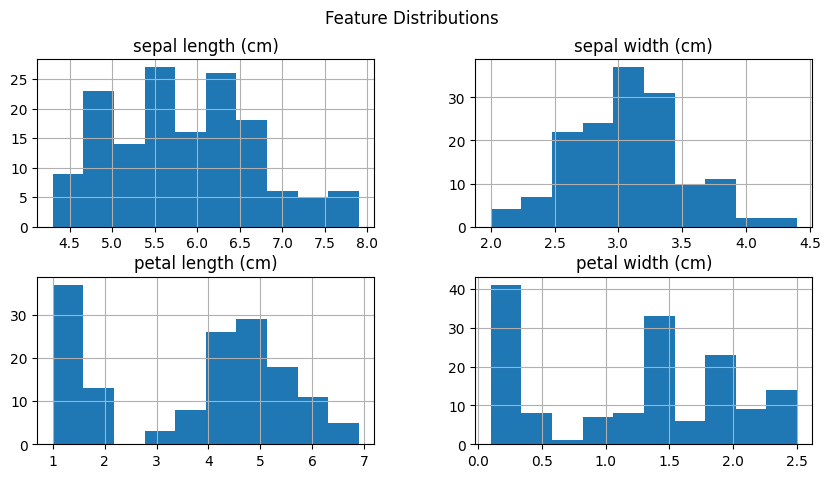

In [5]:
import matplotlib.pyplot as plt

df[dataset.feature_names].hist(figsize=(10, 5))
plt.suptitle("Feature Distributions")
plt.show()

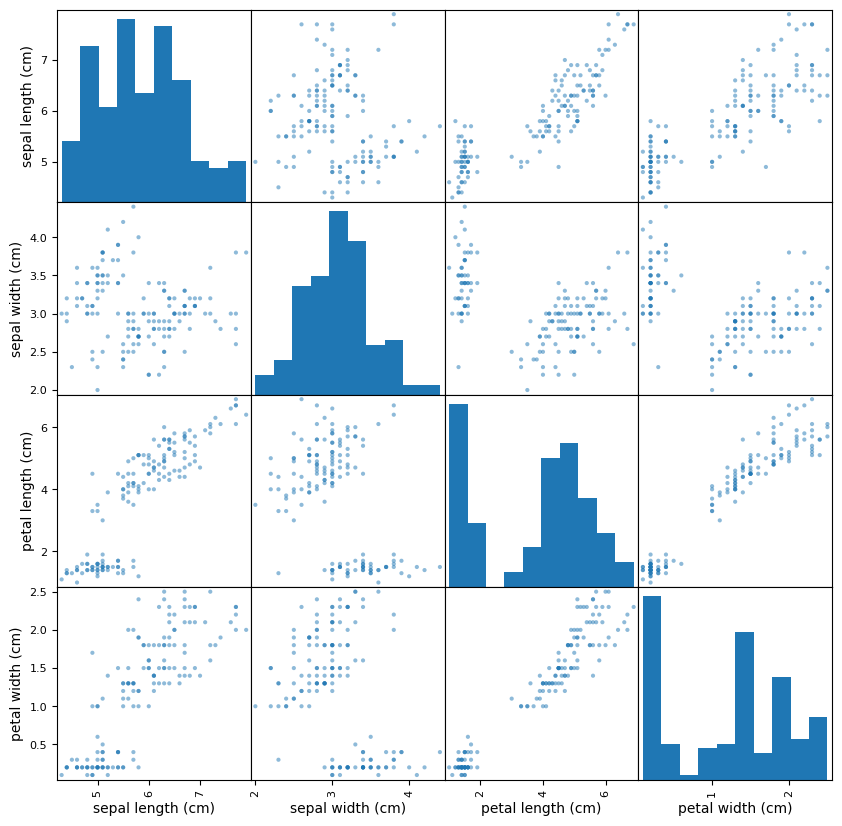

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[dataset.feature_names], figsize=(10, 10), diagonal='hist')
plt.show()

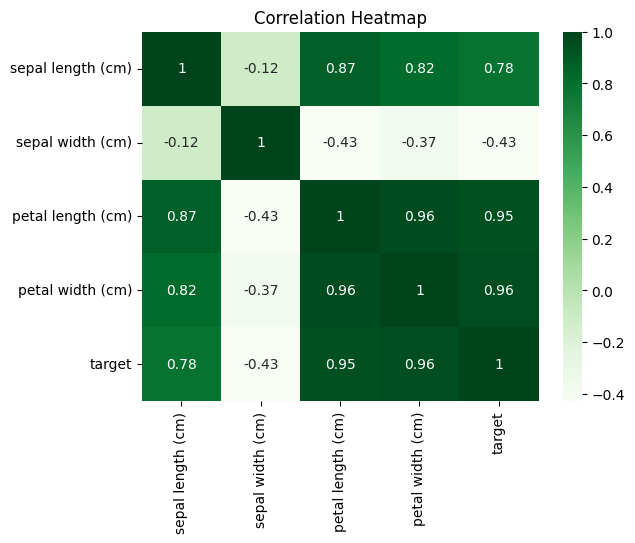

In [7]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

# Task 3

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
) 

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (105, 4)
Test Size (45, 4)


# Task 4

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
Y_pred = model.predict(X_test)
Y_pred

array([2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       1])

# Task 5

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy", round(accuracy*100,2),"%")

Accuracy 93.33 %


Confusion Matrix [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


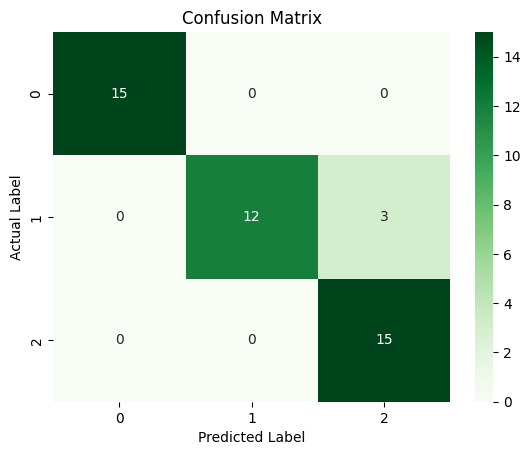

In [12]:
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix",cm)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [13]:
print('=====Classification Report=====')
cr = classification_report(Y_test, Y_pred, target_names=dataset.target_names)
print(cr)

=====Classification Report=====
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



# Task 6

In [14]:
modelEntropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelEntropy.fit(X_train, Y_train)
y_pred_entropy = model.predict(X_test)
print("Accuracy (Entropy):", round(accuracy_score(Y_test, y_pred_entropy) * 100, 2), "%")

Accuracy (Entropy): 93.33 %


In [15]:
for depth in [1, 2, 3, 4, 5, 6, None]:
    model_depth = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    model_depth.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, model_depth.predict(X_test))
    print(f"Max Depth = {depth}, Accuracy = {round(acc*100,2)}%")

Max Depth = 1, Accuracy = 66.67%
Max Depth = 2, Accuracy = 88.89%
Max Depth = 3, Accuracy = 97.78%
Max Depth = 4, Accuracy = 88.89%
Max Depth = 5, Accuracy = 93.33%
Max Depth = 6, Accuracy = 93.33%
Max Depth = None, Accuracy = 93.33%


In [17]:
for min_split in [2, 5, 10]:
    model_split = DecisionTreeClassifier(criterion='gini', min_samples_split=min_split, random_state=42)
    model_split.fit(X_train, Y_train)
    acc = accuracy_score(Y_test, model_split.predict(X_test))
    print(f"min_samples_split = {min_split}, Accuracy = {round(acc*100,2)}%")

min_samples_split = 2, Accuracy = 93.33%
min_samples_split = 5, Accuracy = 93.33%
min_samples_split = 10, Accuracy = 93.33%


# 1. Criterion (Gini vs Entropy):

Using Gini criterion gave slightly higher accuracy (93.33%) compared to Entropy (88.89%).
Both criteria work, but results can vary depending on dataset characteristics.

# 2. Max Depth:

Trees with smaller depth (2 or 4) showed lower accuracy (88.89%), indicating underfitting.
Trees with higher depth (6 or None) improved accuracy to 93.33%, capturing more patterns.
Depth beyond 6 did not further improve test accuracy, showing that a moderately deep tree is sufficient.

# 3. min_samples_split:

Varying min_samples_split (2, 5, 10) had minimal effect on accuracy (all 93.33%), likely due to the small/simple dataset.
Lower values allow more splits (complex tree), higher values make the tree simpler.

# Conclusion:

Optimal parameters for this dataset: criterion = Gini, max_depth = 6, min_samples_split = 2.
Underfitting occurs at small depths, while overfitting was not significant in this case